국민건강보험공단, 건강보험심사평가원,「건강보험통계」, 2022 3/4, 2023.02.10, 시군구별 표시과목별 의원 현황\
https://kosis.kr/statHtml/statHtml.do?orgId=354&tblId=DT_HIRA4G&conn_path=I2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
import numpy as np
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [3]:
obgyn = pd.read_csv('../../Data/public health/산부인과의원 지역별 06_22.csv', encoding='euc-kr')

In [4]:
obgyn['시점'].replace()

0       2006.12
1       2006.12
2       2006.12
3       2006.12
4       2006.12
         ...   
278    2022.3/4
279    2022.3/4
280    2022.3/4
281    2022.3/4
282    2022.3/4
Name: 시점, Length: 283, dtype: object

In [5]:
# 시점 컬럼을 yyyy 형태로 바꾼 뒤, index로 변환
obgyn_willIndex = obgyn['시점']
obgyn_willIndex = list(obgyn_willIndex)
for i in range(0,len(obgyn_willIndex)):
    obgyn_willIndex[i] = obgyn_willIndex[i].split('.')[0]
obgyn['시점'] = obgyn_willIndex
obgyn['시점'] = obgyn['시점'].astype(int)
obgyn.head()


,시점,시군구별(1),산부인과,소아청소년과
0,2006,서울,497,541
1,2006,부산,130,173
2,2006,대구,109,116
3,2006,인천,92,114
4,2006,광주,53,79


In [6]:
obgyn[obgyn['시점'] == 2022]

,시점,시군구별(1),산부인과,소아청소년과
266,2022,서울,393,454
267,2022,부산,68,136
268,2022,대구,79,116
269,2022,인천,60,141
270,2022,광주,36,41
271,2022,대전,41,58
272,2022,울산,30,32
273,2022,세종,9,22
274,2022,경기,287,663
275,2022,강원,33,57


In [7]:
# 시군구별 컬럼을 서울->서울특별시로 변경

obgyn.rename(columns = {'시군구별(1)':'시도별'},inplace=True)

before = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주']
after =['서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시',
       '세종특별자치시','경기도','강원도','충청북도','충청남도','전라북도','전라남도','경상북도','경상남도','제주도']
obgyn.replace(before,after,inplace=True)
obgyn['시도별'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주도', '세종특별자치시'], dtype=object)

In [8]:
# index를 시도별로 정렬
obgyn.set_index('시도별', inplace=True, drop=True)

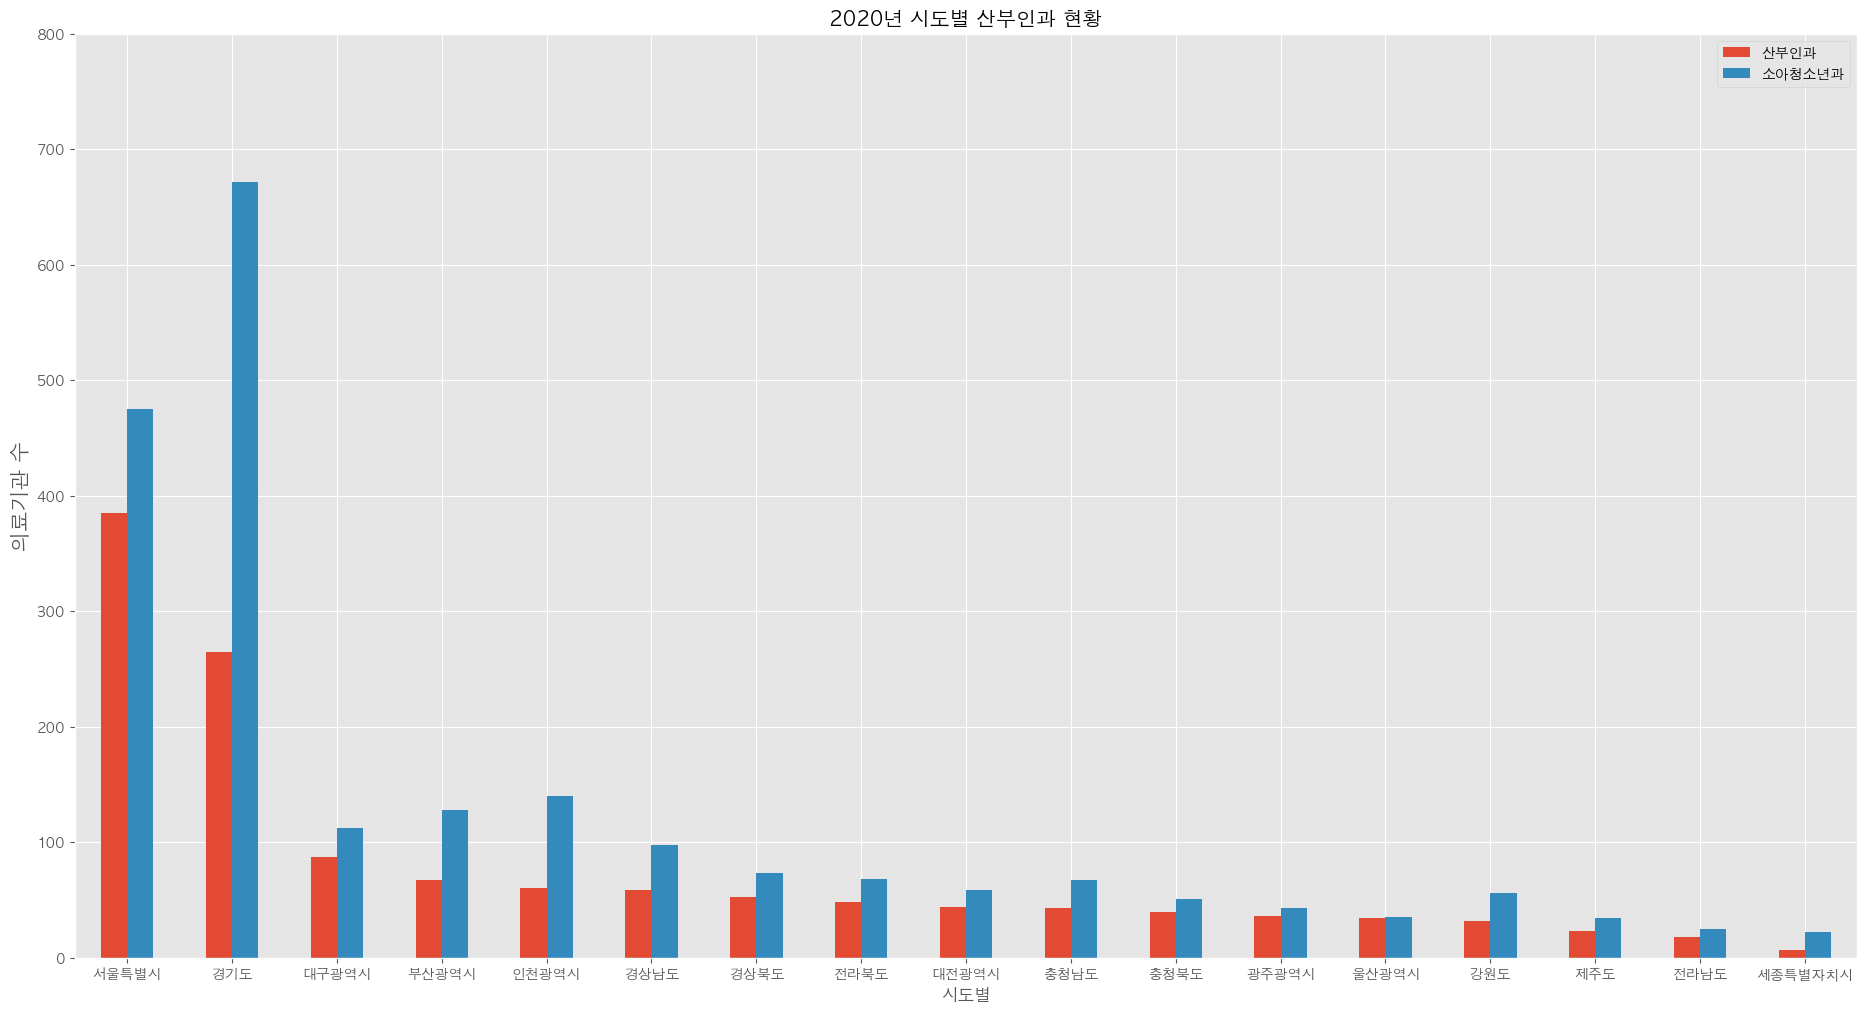

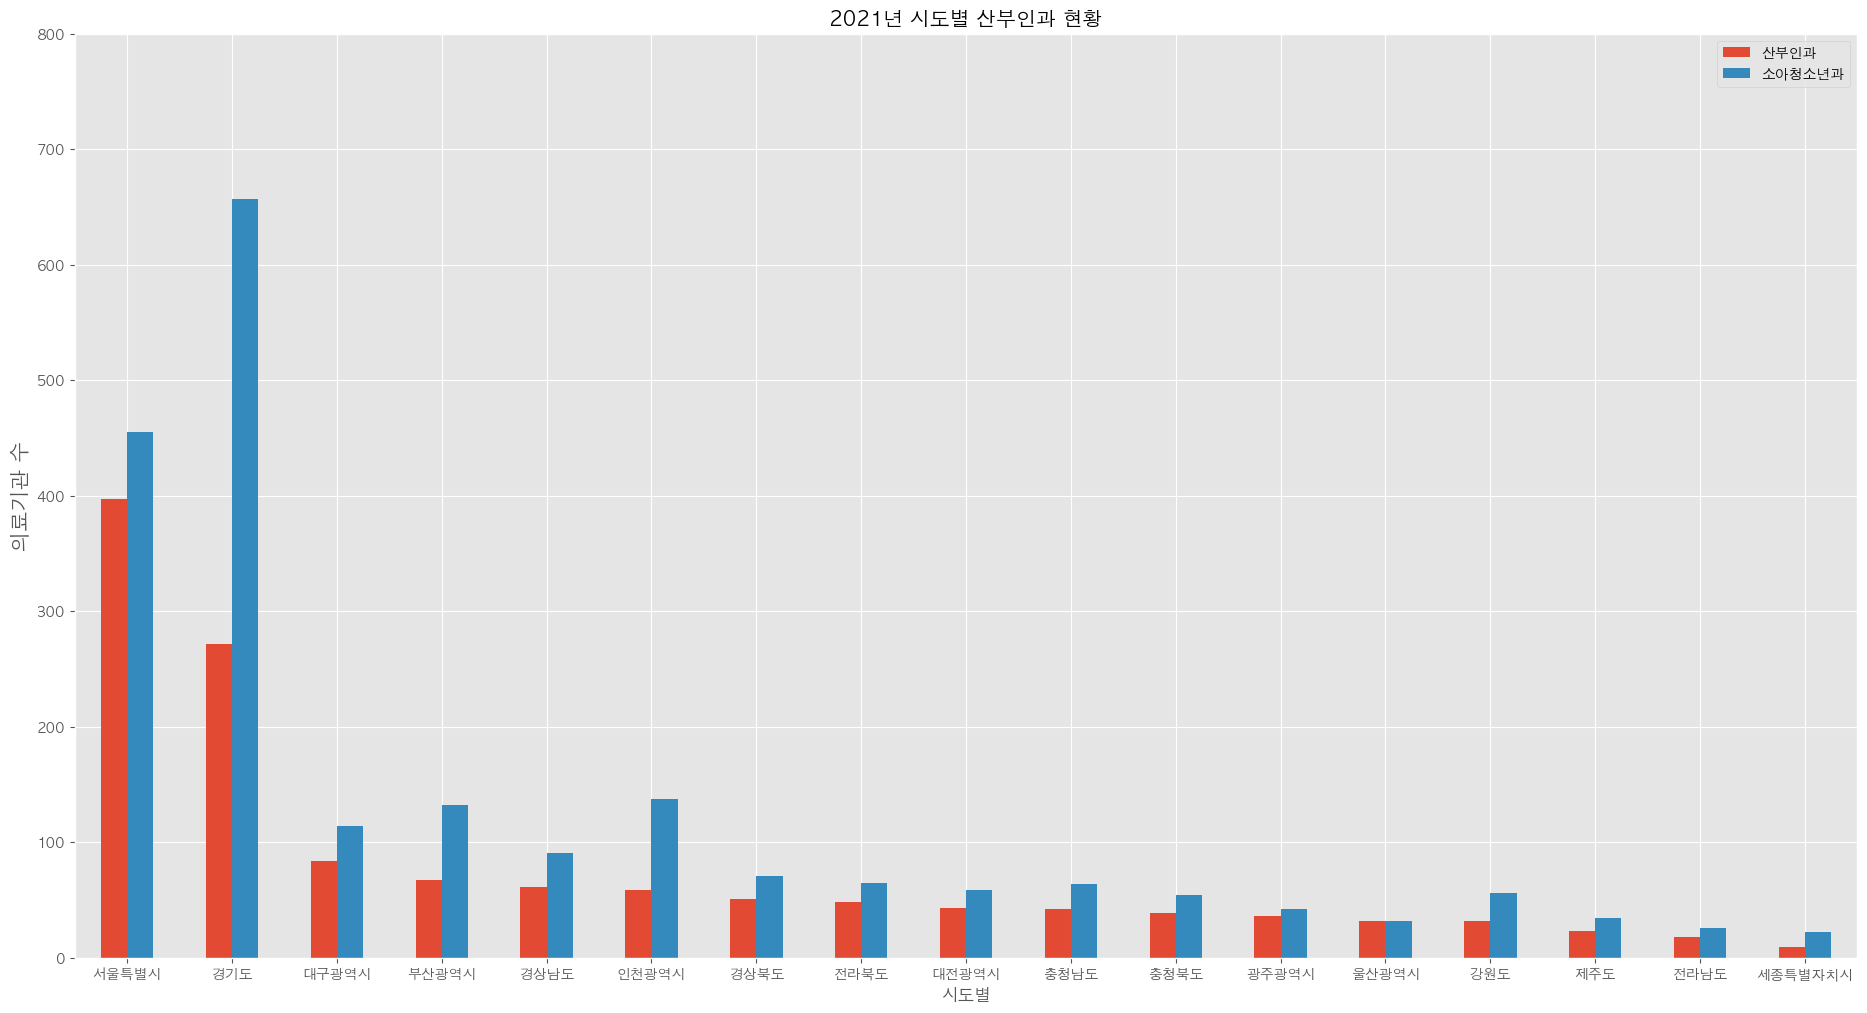

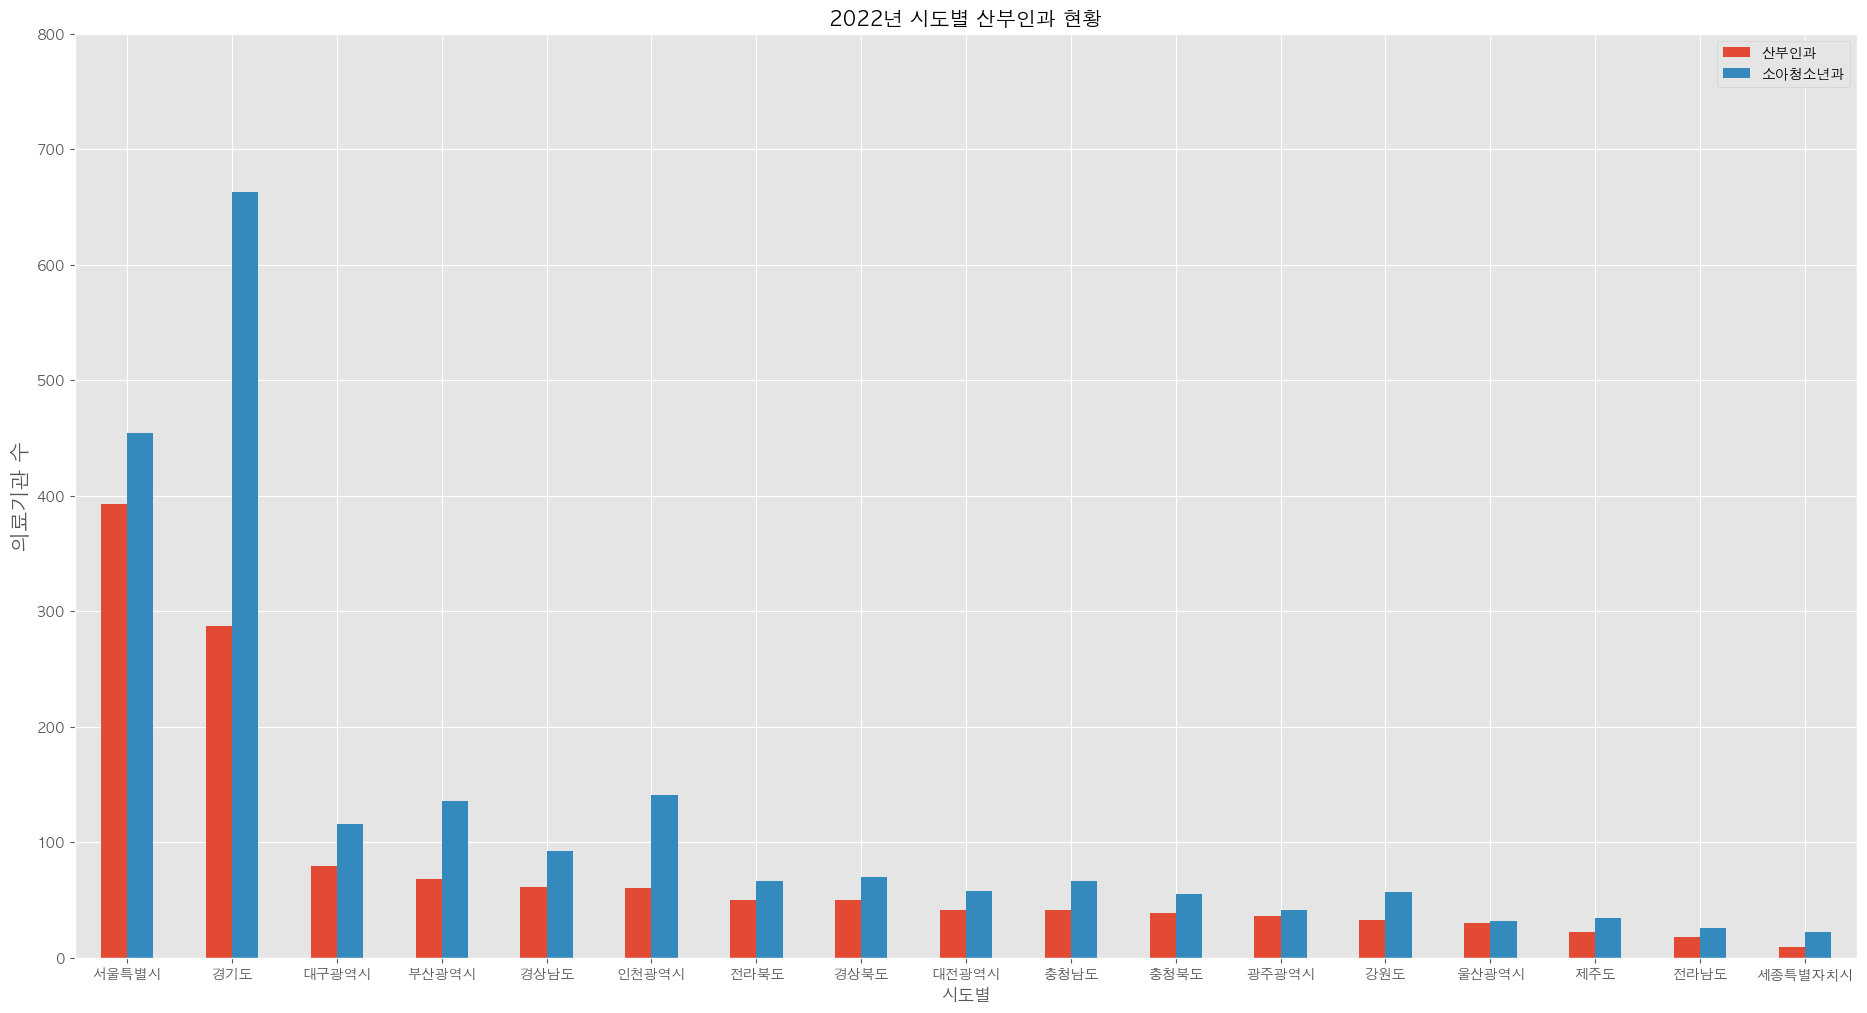

In [9]:
# 년도별 시도별 산부인과, 소아청소년과 의원수 그래프

years = [2020,2021,2022]
for year in years:
# for year in list(obgyn['시점'].unique()):
    plt.style.use('ggplot')
    df = obgyn[obgyn['시점'] == year].iloc[:,1:3].sort_values(by='산부인과', ascending=False)
    df.plot(
        kind='bar', 
        figsize=(23,12),
        # color = colors,
        )
    plt.xticks(rotation="horizontal",size=10) # vertical은 90도
    plt.ylabel("의료기관 수", size=15)
    plt.title('%d년 시도별 산부인과 현황' %year)
    plt.ylim(0,800)
    plt.show()

In [10]:
import seaborn as sns

TypeError: get_ticklocs() takes 1 positional argument but 2 were given

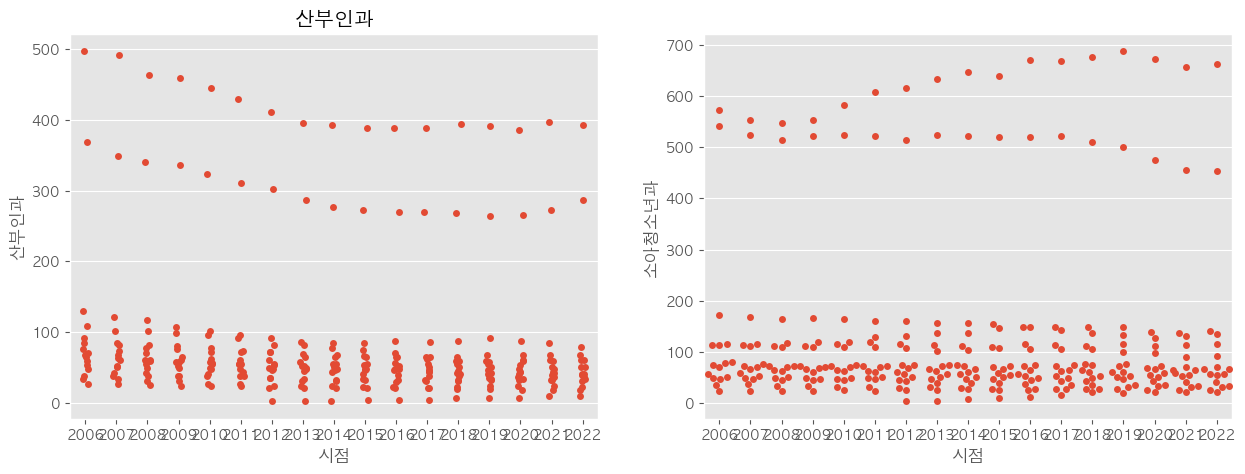

In [18]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
    x = '시점',
    y = '산부인과',
    data = obgyn,
    ax = ax1,
    # palette = 'Set3',
    # hue = 'class',
)
sns.swarmplot(
    x = '시점',
    y = '소아청소년과',
    data = obgyn,
    ax = ax2,
    # palette = 'Set1',
    # hue = 'class',
)

ax1.set_title('산부인과')
ax2.set_title('소아청소년과')

plt.xticks(rotation=90)

plt.show()

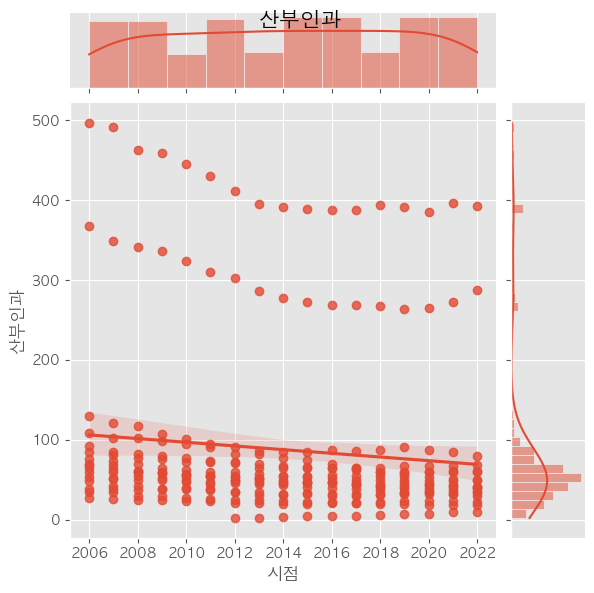

In [12]:
# joint graph - 회귀선
j2 = sns.jointplot(
    x = '시점', 
    y = '산부인과',
    data = obgyn,
    kind = 'reg'
)
j2.fig.suptitle('산부인과',size = 15)
plt.show()

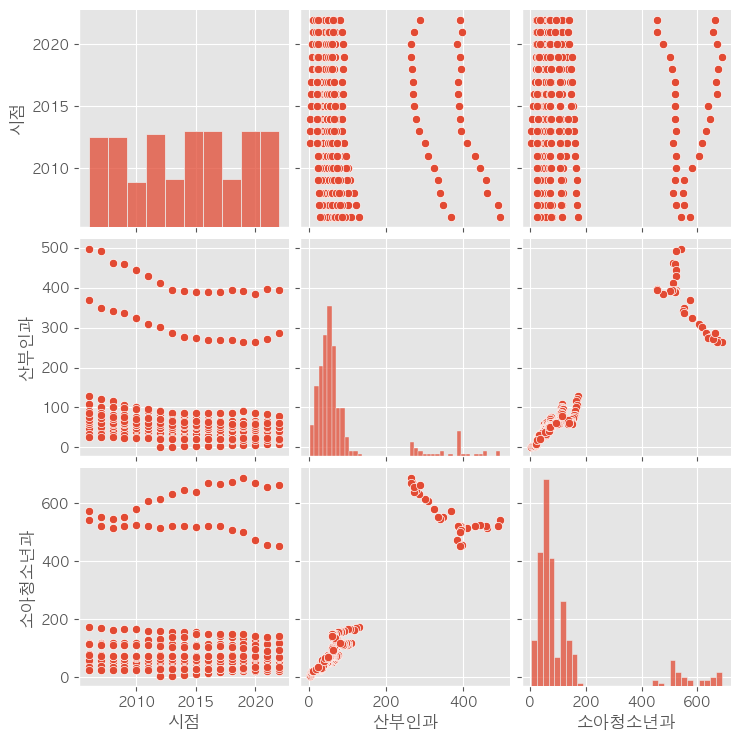

In [13]:
obgyn_pair = obgyn[['시점','산부인과','소아청소년과']]
sns.pairplot(obgyn_pair)
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters=i)
km.fit(obgyn[obgyn['시점'] == 2022].iloc[:,1:3].sort_values(by='산부인과', ascending=False))
# scores.append(km.inertia_)
# 군집화한 Cluster 갯수와 확인
np.unique(km.labels_, return_counts=True) #return_counts : unique한 갯수를 보여 준다.

ValueError: n_samples=17 should be >= n_clusters=282.

In [ ]:
obgyn.to_csv('../../Data/public health/obgyn.csv', encoding='utf-8', index=True)